In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\toka\College\big data project\heart_attack_prediction.csv", index_col=0)
pd.set_option("display.max_rows", 5)

In [3]:
df.head()

,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,smoking_status,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
age,,,,,,,,,,,,,,,,,,,,,
60,Male,Rural,Middle,0,1,211,0,83,0,Never,...,62,173,48,121,101,Normal,0,0,0,0
53,Female,Urban,Low,0,0,208,0,106,1,Past,...,76,70,58,83,138,Normal,1,0,1,0
62,Female,Urban,Low,0,0,231,1,112,1,Past,...,74,118,69,130,171,Abnormal,0,1,0,1
73,Male,Urban,Low,1,0,202,0,82,1,Never,...,65,98,52,85,146,Normal,0,1,1,0
52,Male,Urban,Middle,1,0,232,0,89,0,Current,...,75,104,59,127,139,Normal,1,0,1,1


In [4]:
print(df.shape)

(158355, 27)


In [5]:
df = df.reset_index()

In [6]:
print(df.shape)

(158355, 28)


In [7]:
df.head()

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59,127,139,Normal,1,0,1,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  object 
 2   region                          158355 non-null  object 
 3   income_level                    158355 non-null  object 
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10  smoking_status                  158355 non-null  object 
 11  alcohol_consumption             63507 non-null   object 
 12  physical_activit

In [9]:
# Check duplicates
print(df.duplicated().sum())

0


In [10]:
pd.set_option('display.max_rows', None) # show all rows
df.isnull().sum()

age                                   0
gender                                0
region                                0
income_level                          0
hypertension                          0
diabetes                              0
cholesterol_level                     0
obesity                               0
waist_circumference                   0
family_history                        0
smoking_status                        0
alcohol_consumption               94848
physical_activity                     0
dietary_habits                        0
air_pollution_exposure                0
stress_level                          0
sleep_hours                           0
blood_pressure_systolic               0
blood_pressure_diastolic              0
fasting_blood_sugar                   0
cholesterol_hdl                       0
cholesterol_ldl                       0
triglycerides                         0
EKG_results                           0
previous_heart_disease                0


In [11]:
df['alcohol_consumption'].dtype

dtype('O')

In [12]:
df['alcohol_consumption'] = df['alcohol_consumption'].fillna(df['alcohol_consumption'].mode()[0]) # this is from feature engineering

In [13]:
pd.set_option('display.max_rows', None) # show all rows
df.isnull().sum()

age                               0
gender                            0
region                            0
income_level                      0
hypertension                      0
diabetes                          0
cholesterol_level                 0
obesity                           0
waist_circumference               0
family_history                    0
smoking_status                    0
alcohol_consumption               0
physical_activity                 0
dietary_habits                    0
air_pollution_exposure            0
stress_level                      0
sleep_hours                       0
blood_pressure_systolic           0
blood_pressure_diastolic          0
fasting_blood_sugar               0
cholesterol_hdl                   0
cholesterol_ldl                   0
triglycerides                     0
EKG_results                       0
previous_heart_disease            0
medication_usage                  0
participated_in_free_screening    0
heart_attack                

Exploratory Data Analysis

Bar plot for gender distribution

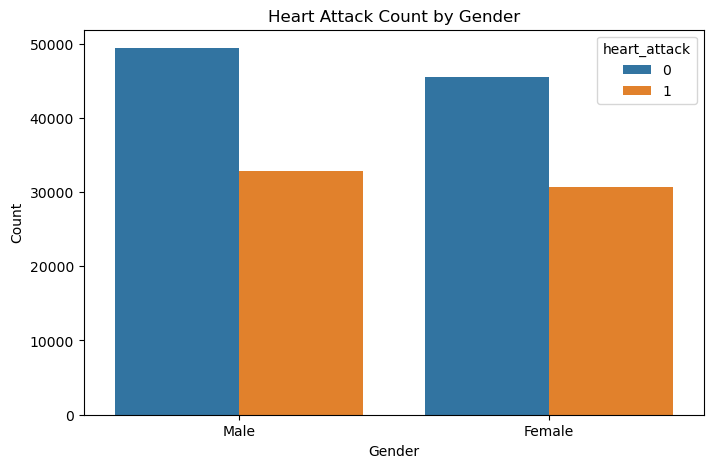

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', hue='heart_attack', data=df)
plt.title('Heart Attack Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Both males and females experience heart attacks, but the count is slightly higher in males.

Bar plot for region distribution 

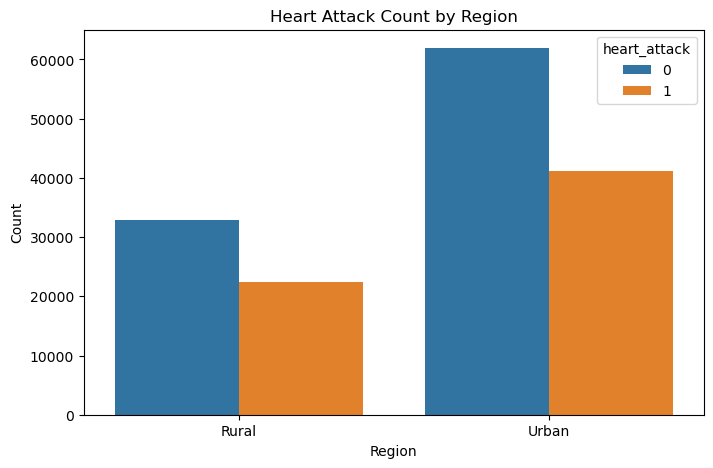

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(x='region', hue='heart_attack', data=df)
plt.title('Heart Attack Count by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

There are more urban individuals in the dataste

For fair comparison, visualize the percentage of heart attacks within each region

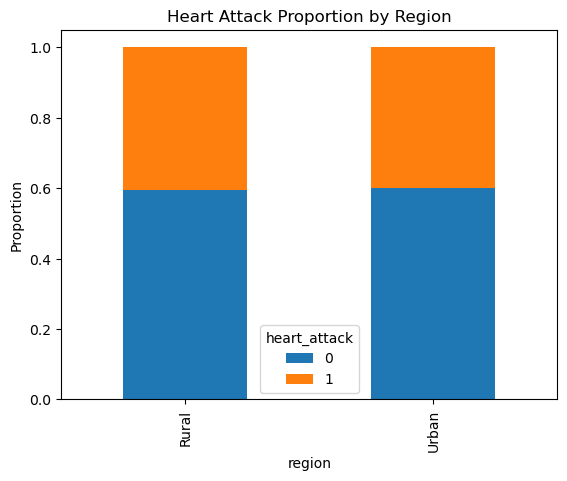

In [16]:
region_heart_attack_rate = df.groupby('region')['heart_attack'].value_counts(normalize=True).unstack()

region_heart_attack_rate.plot(kind='bar', stacked=True)
plt.title('Heart Attack Proportion by Region')
plt.ylabel('Proportion')
plt.show()

The proportion of heart attack cases is the same in both rural and urban regions

Bar plot for income level distribution

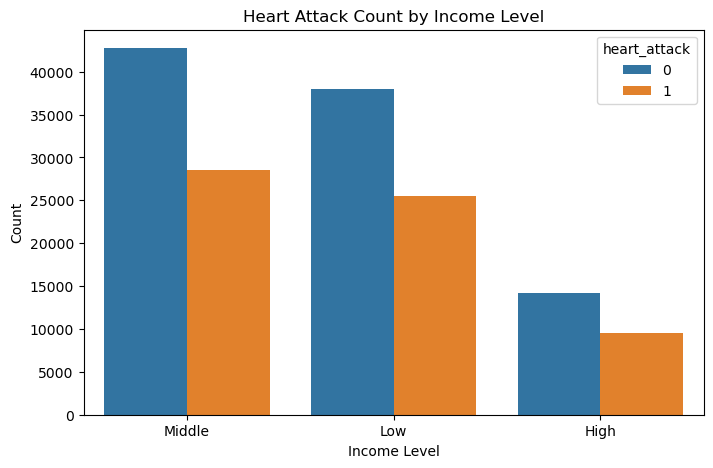

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(x='income_level', hue='heart_attack', data=df)
plt.title('Heart Attack Count by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.show()

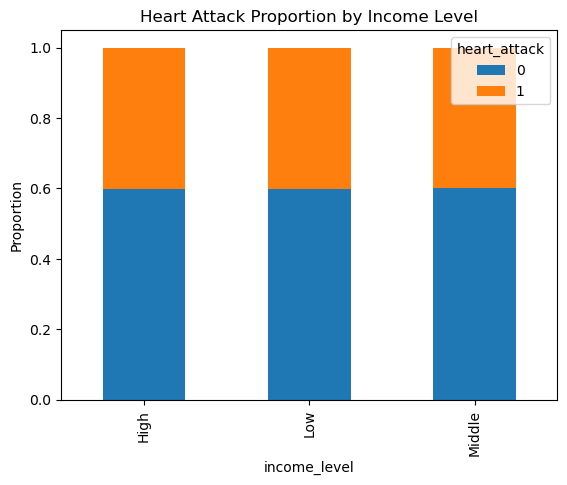

In [18]:
income_level_heart_attack_rate = df.groupby('income_level')['heart_attack'].value_counts(normalize=True).unstack()

income_level_heart_attack_rate.plot(kind='bar', stacked=True)
plt.title('Heart Attack Proportion by Income Level')
plt.ylabel('Proportion')
plt.show()

The proportion of heart attack cases is the same among income levels

Bar plot for smoking status distribution

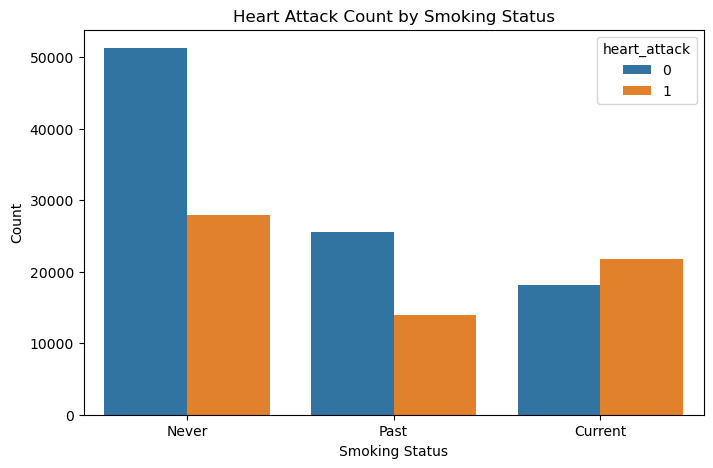

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(x='smoking_status', hue='heart_attack', data=df)
plt.title('Heart Attack Count by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

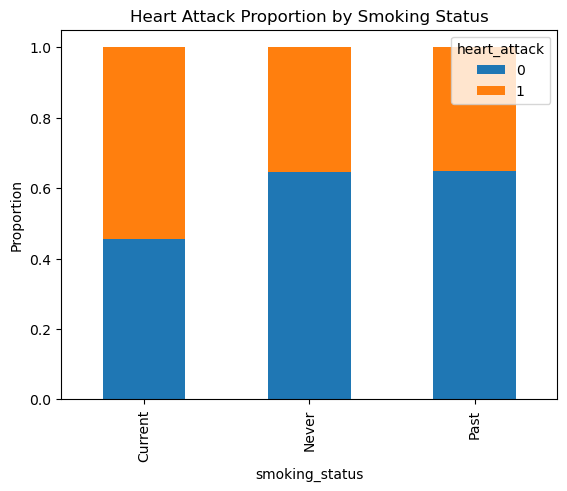

In [20]:
smoking_status_heart_attack_rate = df.groupby('smoking_status')['heart_attack'].value_counts(normalize=True).unstack()

smoking_status_heart_attack_rate.plot(kind='bar', stacked=True)
plt.title('Heart Attack Proportion by Smoking Status')
plt.ylabel('Proportion')
plt.show()

current smokers have a higher proportion of heart attacks compared to those who never or previously smoked

Bar plot for alcohol consumption distribution

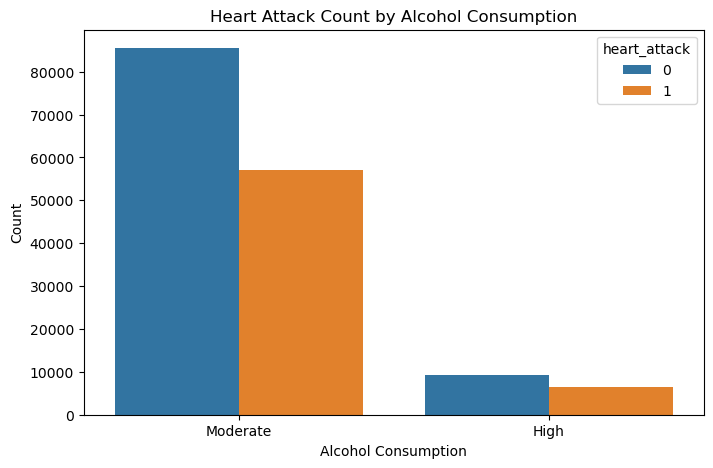

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(x='alcohol_consumption', hue='heart_attack', data=df)
plt.title('Heart Attack Count by Alcohol Consumption')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Count')
plt.show()

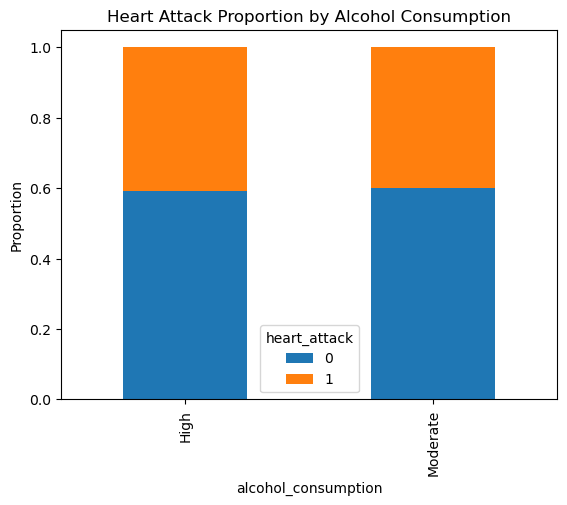

In [22]:
alcohol_consumption_heart_attack_rate = df.groupby('alcohol_consumption')['heart_attack'].value_counts(normalize=True).unstack()

alcohol_consumption_heart_attack_rate.plot(kind='bar', stacked=True)
plt.title('Heart Attack Proportion by Alcohol Consumption')
plt.ylabel('Proportion')
plt.show()

The proportion of heart attack cases is the same for both high and moderate alcohol consumption

Bar plot for physical activity distribution

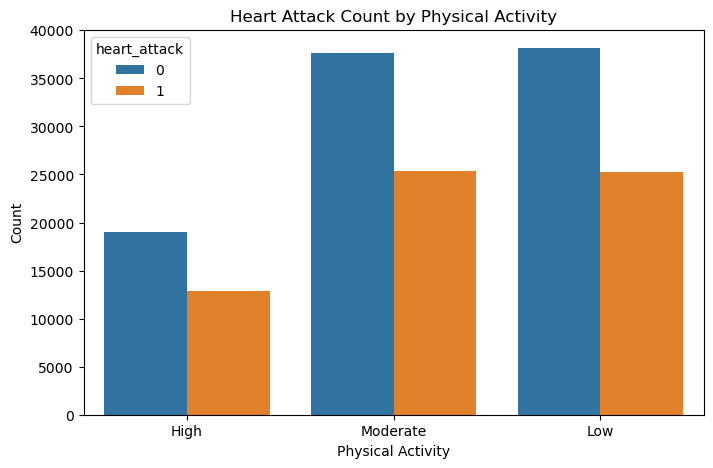

In [23]:
plt.figure(figsize=(8, 5))
sns.countplot(x='physical_activity', hue='heart_attack', data=df)
plt.title('Heart Attack Count by Physical Activity')
plt.xlabel('Physical Activity')
plt.ylabel('Count')
plt.show()

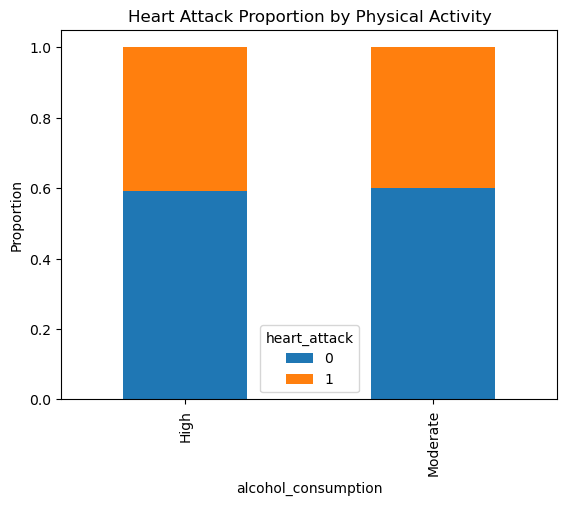

In [24]:
physical_activity_heart_attack_rate = df.groupby('alcohol_consumption')['heart_attack'].value_counts(normalize=True).unstack()

physical_activity_heart_attack_rate.plot(kind='bar', stacked=True)
plt.title('Heart Attack Proportion by Physical Activity')
plt.ylabel('Proportion')
plt.show()

The proportion of heart attack cases is the same for both high and moderate physical activity

Bar plot for dietary habits distribution

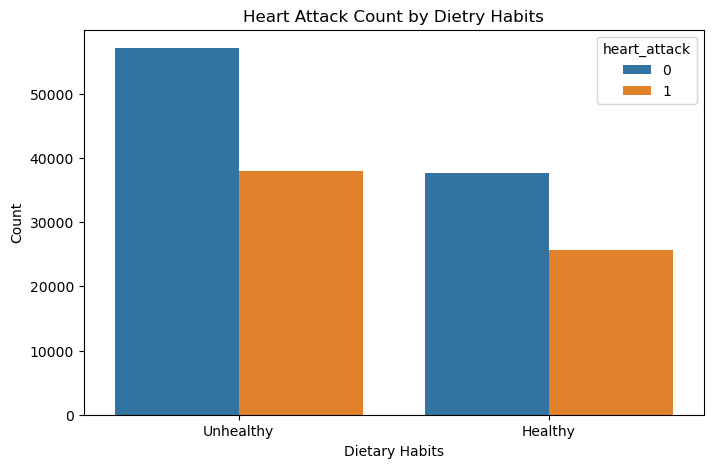

In [25]:
plt.figure(figsize=(8, 5))
sns.countplot(x='dietary_habits', hue='heart_attack', data=df)
plt.title('Heart Attack Count by Dietry Habits')
plt.xlabel('Dietary Habits')
plt.ylabel('Count')
plt.show()

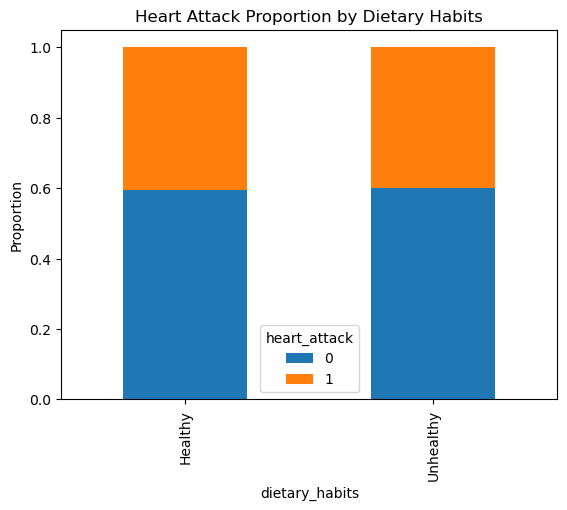

In [26]:
dietary_habits_heart_attack_rate = df.groupby('dietary_habits')['heart_attack'].value_counts(normalize=True).unstack()

dietary_habits_heart_attack_rate.plot(kind='bar', stacked=True)
plt.title('Heart Attack Proportion by Dietary Habits')
plt.ylabel('Proportion')
plt.show()

The proportion of heart attack cases is the same for both healthy and unhealthy dietary habits

Bar plot for air pollution exposure distribution

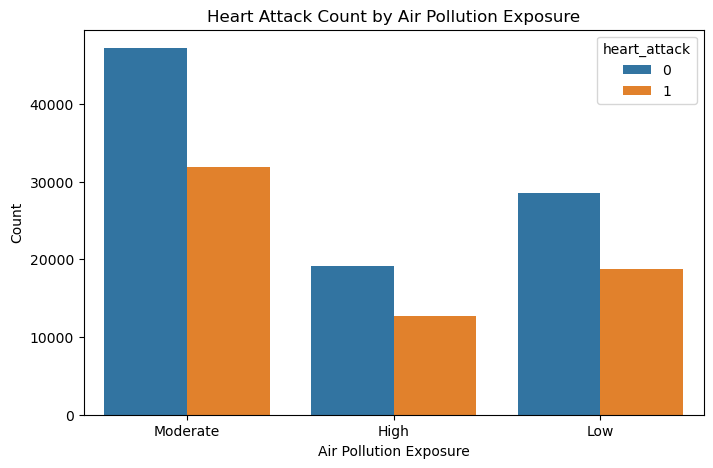

In [27]:
plt.figure(figsize=(8, 5))
sns.countplot(x='air_pollution_exposure', hue='heart_attack', data=df)
plt.title('Heart Attack Count by Air Pollution Exposure')
plt.xlabel('Air Pollution Exposure')
plt.ylabel('Count')
plt.show()

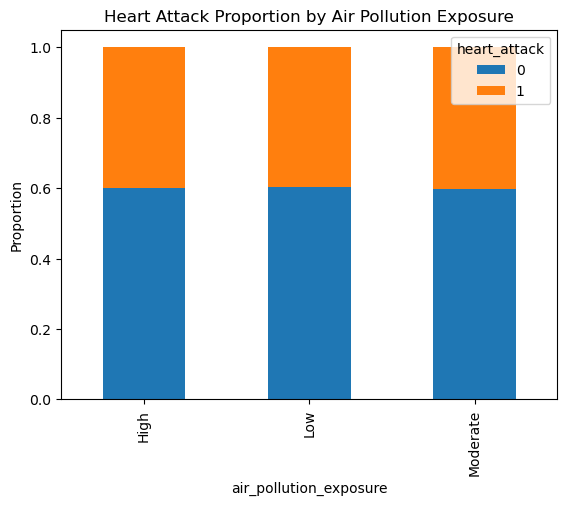

In [28]:
air_pollution_exposure_heart_attack_rate = df.groupby('air_pollution_exposure')['heart_attack'].value_counts(normalize=True).unstack()

air_pollution_exposure_heart_attack_rate.plot(kind='bar', stacked=True)
plt.title('Heart Attack Proportion by Air Pollution Exposure')
plt.ylabel('Proportion')
plt.show()

The proportion of heart attack cases is the same for all air pollution exposure levels

Bar plot for stress level distribution

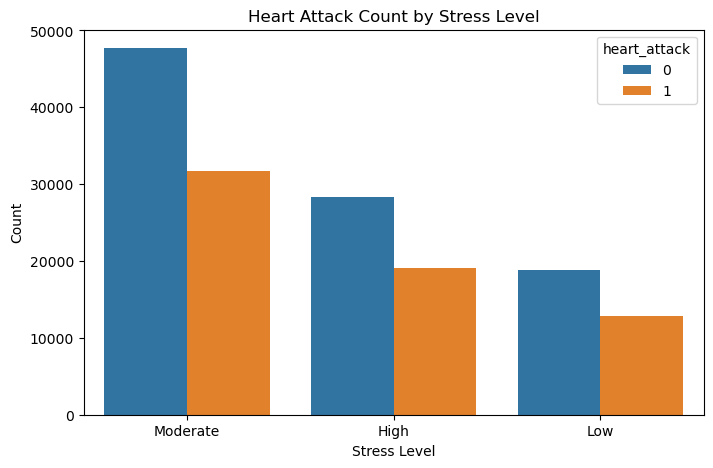

In [29]:
plt.figure(figsize=(8, 5))
sns.countplot(x='stress_level', hue='heart_attack', data=df)
plt.title('Heart Attack Count by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.show()

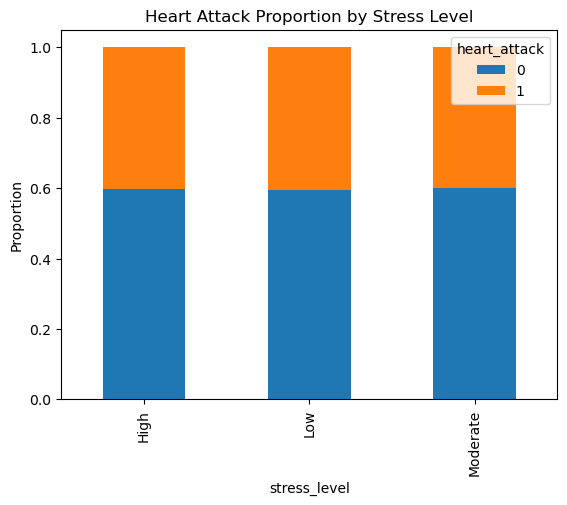

In [30]:
stress_level_heart_attack_rate = df.groupby('stress_level')['heart_attack'].value_counts(normalize=True).unstack()

stress_level_heart_attack_rate.plot(kind='bar', stacked=True)
plt.title('Heart Attack Proportion by Stress Level')
plt.ylabel('Proportion')
plt.show()

The proportion of heart attack cases is the same for all stress levels

In [31]:
# Selecting only numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64'])

print(numerical_cols.columns)

Index(['age', 'hypertension', 'diabetes', 'cholesterol_level', 'obesity',
       'waist_circumference', 'family_history', 'sleep_hours',
       'blood_pressure_systolic', 'blood_pressure_diastolic',
       'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl',
       'triglycerides', 'previous_heart_disease', 'medication_usage',
       'participated_in_free_screening', 'heart_attack'],
      dtype='object')


In [32]:
unique_values_age = df['age'].unique()
unique_values_cholesterol_level = df['cholesterol_level'].unique()
unique_values_waist_circumference = df['waist_circumference'].unique()
unique_values_fasting_blood_sugar = df['fasting_blood_sugar'].unique()

print(unique_values_age)
print(unique_values_cholesterol_level)
print(unique_values_waist_circumference)
print(unique_values_fasting_blood_sugar)

[60 53 62 73 52 64 49 61 57 32 34 48 42 58 44 38 72 55 37 56 41 59 47 51
 77 54 40 31 39 63 46 67 33 50 66 71 25 45 65 84 68 81 43 36 70 35 87 90
 82 80 30 76 74 29 69 79 78 27 75 28 85 86 83 26 88 89]
[211 208 231 202 232 238 165 186 121 196 190 234 193 125 134 271 185 230
 132 163 200 191 219 142 180 205 228 265 177 192 176 207 174 225 170 130
 251 201 159 172 153 258 221 189 214 105 255 149 128 199 131 139 133 168
 188 285 252 216 220 212 116 182 250 175 246 215 226 240 210 147 254 227
 243 223 146 241 173 256 244 198 247 187 164 217 218 152 161 303 203 206
 245 151 249 181 178 183 166 184 162 204 156 179 171 158 270 222 136 194
 154 253 167 236 209 266 263 148 242 195 239 235 118 113 229 123 117 197
 233 273 224 272 150 310 298 169 257 268 155 145 213 248 237 160 141 259
 111 275 144 127 264 138 277 305 157 280 119 103 260 135 261 279 140 137
 274 114 115 122 107 100 278 124 283 318 143 306 288 287 120 276 299 269
 129 325 262 106 319 112 293 284 301 281 295 302 296 292 126 289 108

In [33]:
unique_values_hypertension = df['hypertension'].unique()
unique_values_obesity = df['obesity'].unique()
unique_values_diabetes = df['diabetes'].unique()
unique_values_previous_heart_disease = df['previous_heart_disease'].unique()

print(unique_values_hypertension)
print(unique_values_obesity)
print(unique_values_diabetes)
print(unique_values_previous_heart_disease)

[0 1]
[0 1]
[1 0]
[0 1]


Histograms

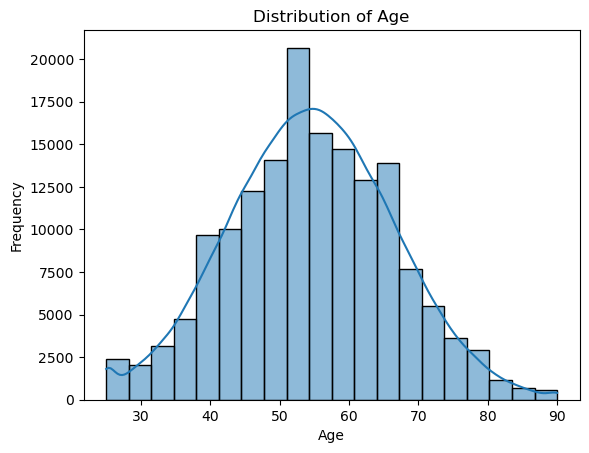

In [34]:
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

The histogram shows the distribution of age in the dataset, with most individuals concentrated around the ages of 50 to 60, following an approximately normal distribution.

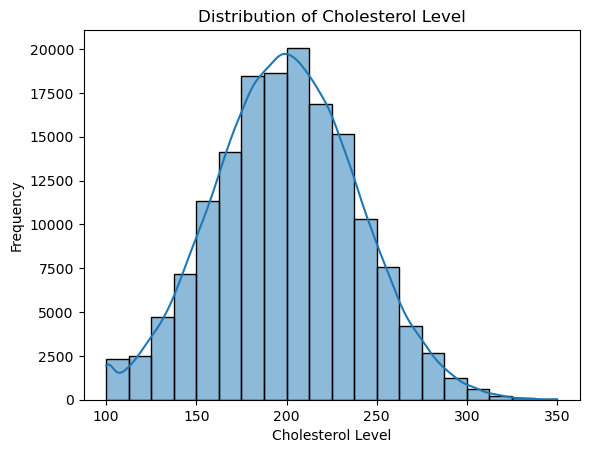

In [35]:
sns.histplot(df['cholesterol_level'], bins=20, kde=True)
plt.title("Distribution of Cholesterol Level")
plt.xlabel("Cholesterol Level")
plt.ylabel("Frequency")
plt.show()

A roughly normal distribution centered around 200, with most values ranging between 150 and 250

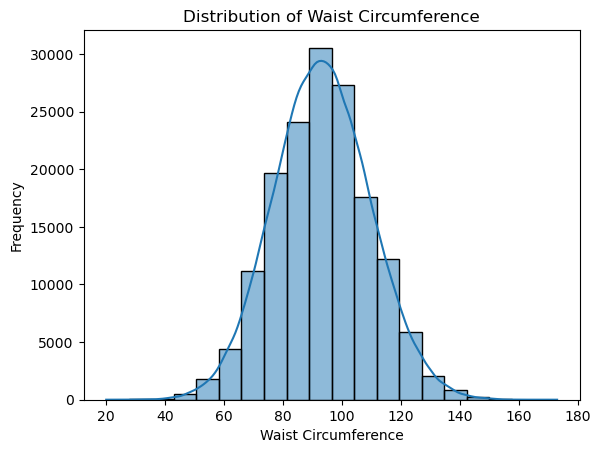

In [36]:
sns.histplot(df['waist_circumference'], bins=20, kde=True)
plt.title("Distribution of Waist Circumference")
plt.xlabel("Waist Circumference")
plt.ylabel("Frequency")
plt.show()

A roughly normal distribution with most values concentrated between 70 and 110

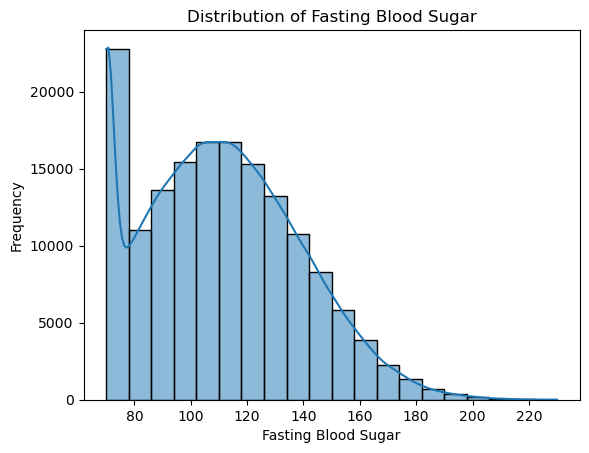

In [37]:
sns.histplot(df['fasting_blood_sugar'], bins=20, kde=True)
plt.title("Distribution of Fasting Blood Sugar")
plt.xlabel("Fasting Blood Sugar")
plt.ylabel("Frequency")
plt.show()

The distribution of fasting blood sugar is right-skewed

Visualize "Correlation" to see if there are highly correlated features so drop one of them or if there is a feature that isn't correlated with the target so drop it 

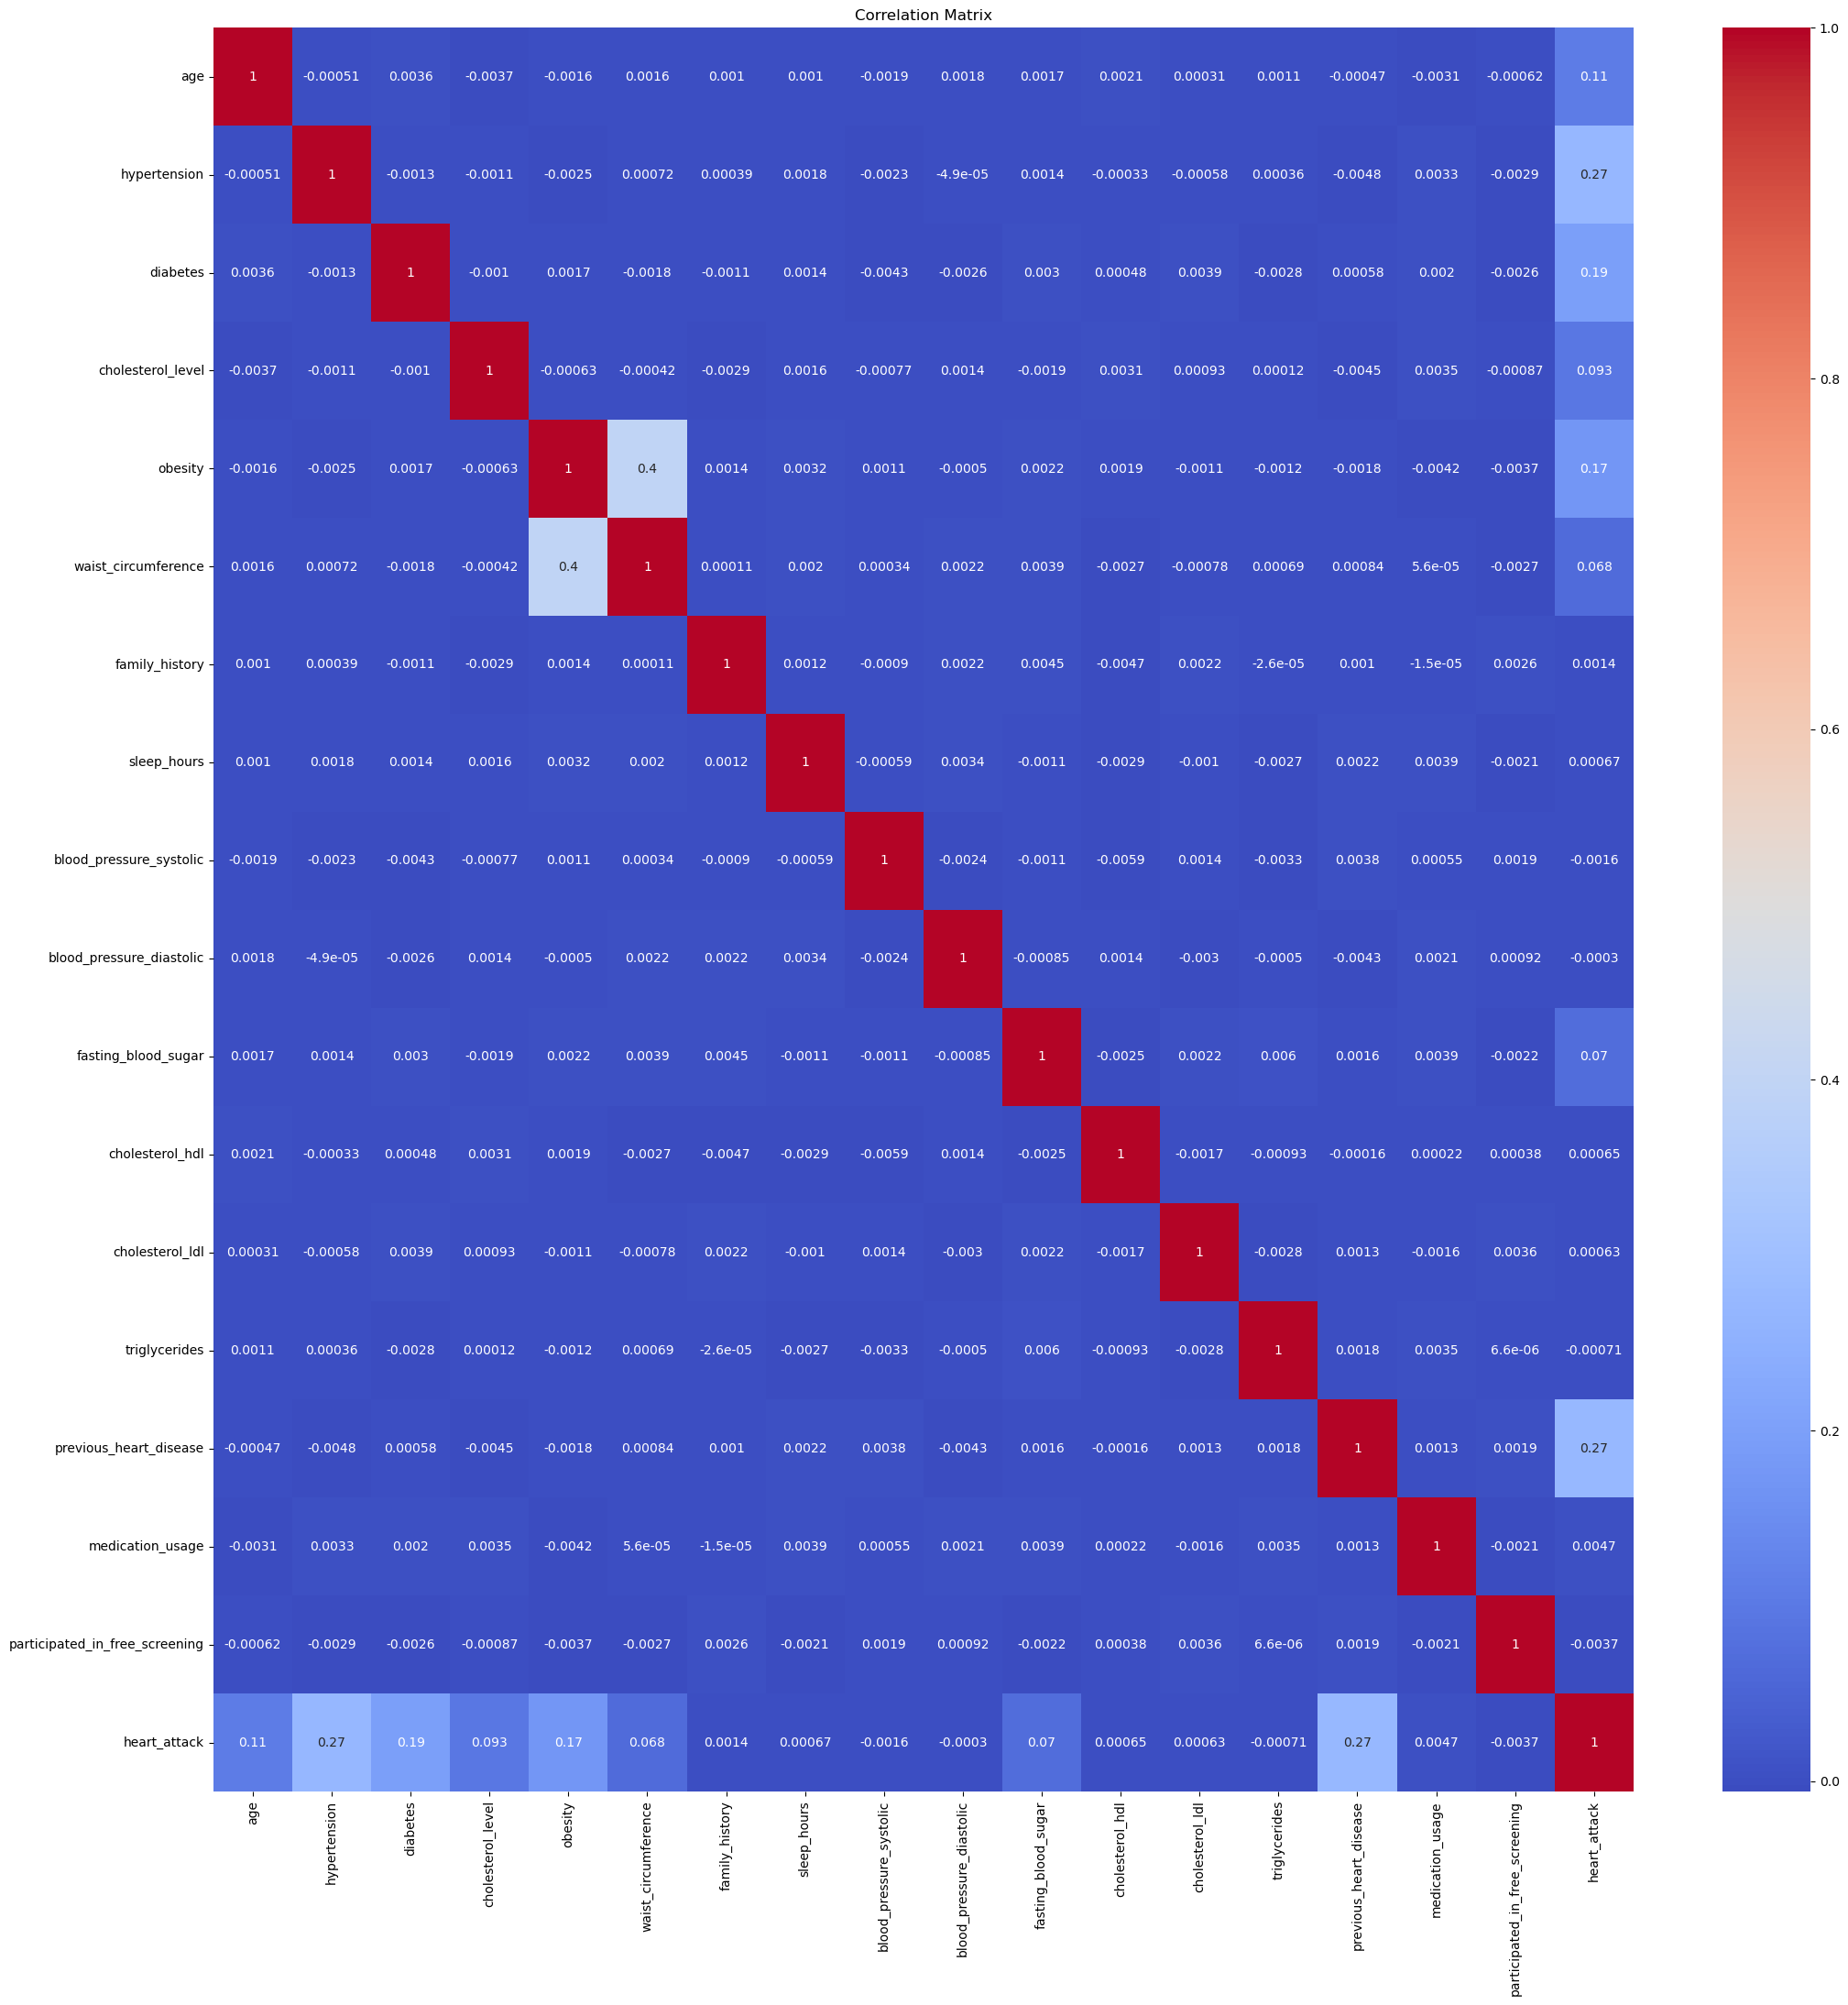

In [38]:
# Select only numerical columns for the correlation matrix
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [39]:
df = df.drop(columns=['family_history', 'sleep_hours', 'blood_pressure_systolic', 'blood_pressure_diastolic', 'cholesterol_hdl', 'cholesterol_ldl', 'triglycerides', 'medication_usage', 'participated_in_free_screening'])

Feature engineering:

1- Removing Outliers

boxplots of all continuous features

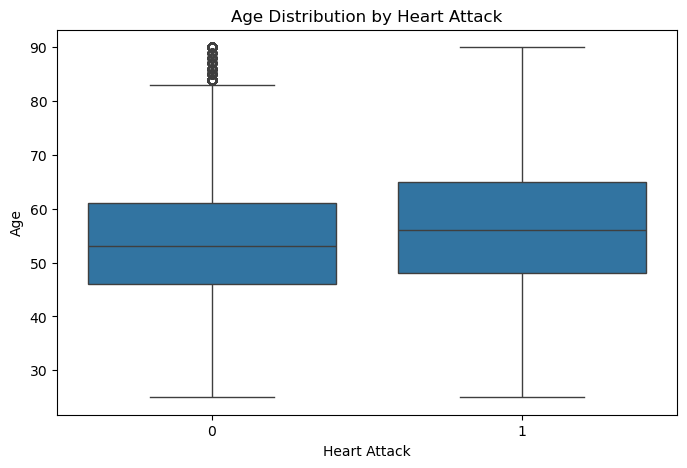

In [40]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='heart_attack', y='age', data=df)
plt.title('Age Distribution by Heart Attack')
plt.xlabel('Heart Attack')
plt.ylabel('Age')
plt.show()

In [41]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]

# Remove outliers
df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)] # the whole row is removed

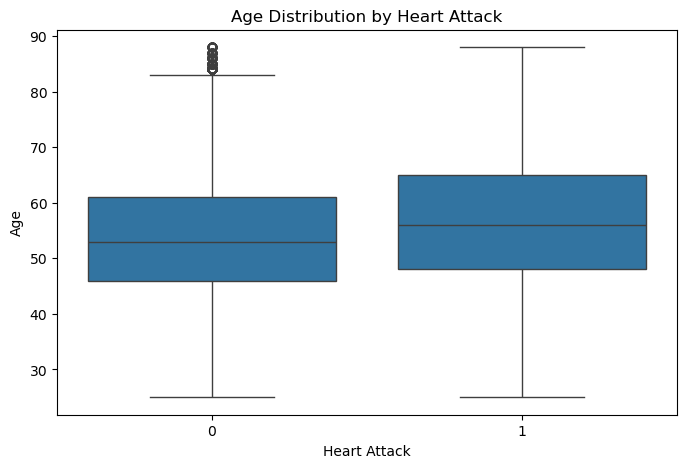

In [42]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='heart_attack', y='age', data=df)
plt.title('Age Distribution by Heart Attack')
plt.xlabel('Heart Attack')
plt.ylabel('Age')
plt.show()

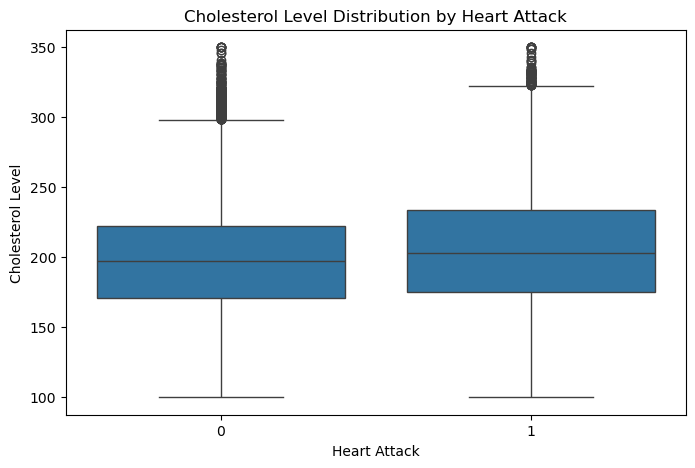

In [43]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='heart_attack', y='cholesterol_level', data=df)
plt.title('Cholesterol Level Distribution by Heart Attack')
plt.xlabel('Heart Attack')
plt.ylabel('Cholesterol Level')
plt.show()

In [44]:
Q1 = df['cholesterol_level'].quantile(0.25)
Q3 = df['cholesterol_level'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['cholesterol_level'] >= lower_bound) & (df['cholesterol_level'] <= upper_bound)] # the whole row is removed

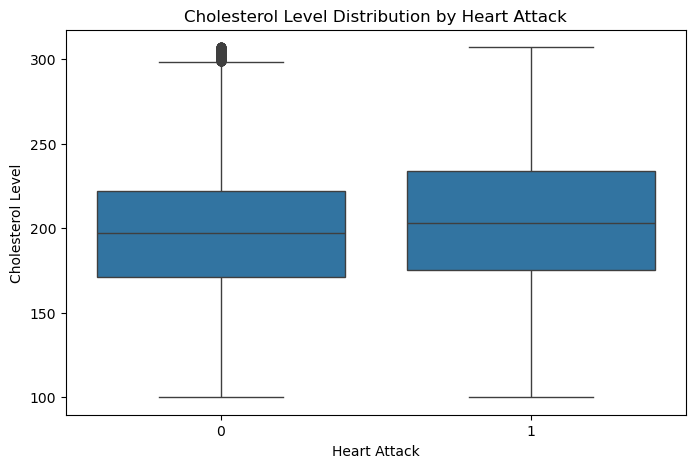

In [45]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='heart_attack', y='cholesterol_level', data=df)
plt.title('Cholesterol Level Distribution by Heart Attack')
plt.xlabel('Heart Attack')
plt.ylabel('Cholesterol Level')
plt.show()

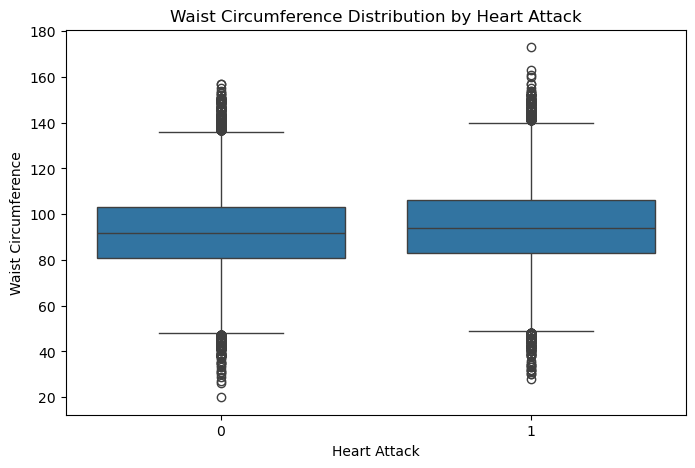

In [46]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='heart_attack', y='waist_circumference', data=df)
plt.title('Waist Circumference Distribution by Heart Attack')
plt.xlabel('Heart Attack')
plt.ylabel('Waist Circumference')
plt.show()

In [47]:
Q1 = df['waist_circumference'].quantile(0.25)
Q3 = df['waist_circumference'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['waist_circumference'] >= lower_bound) & (df['waist_circumference'] <= upper_bound)] # the whole row is removed

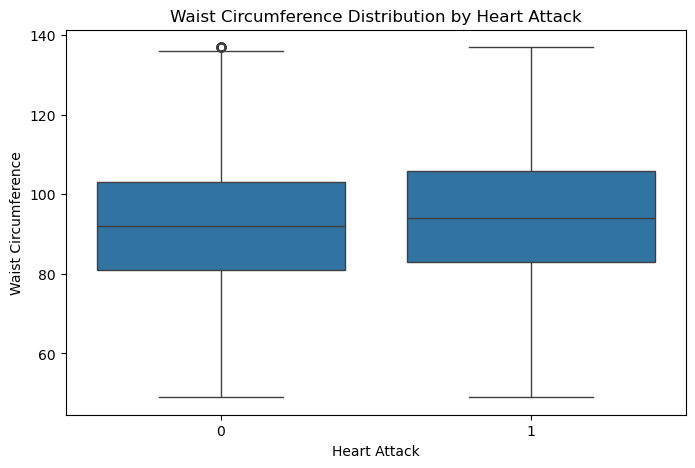

In [48]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='heart_attack', y='waist_circumference', data=df)
plt.title('Waist Circumference Distribution by Heart Attack')
plt.xlabel('Heart Attack')
plt.ylabel('Waist Circumference')
plt.show()

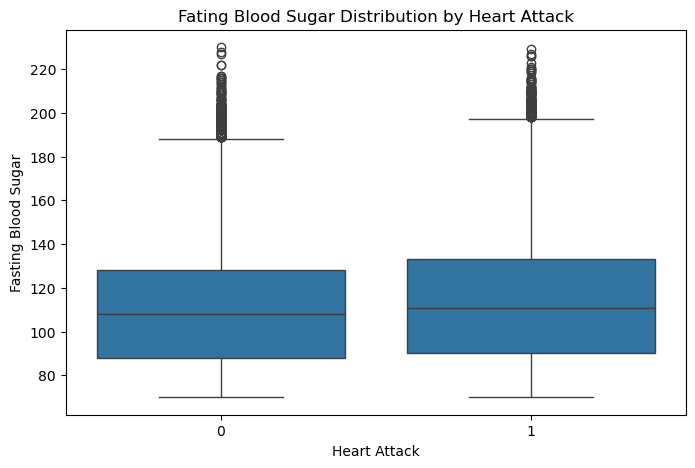

In [49]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='heart_attack', y='fasting_blood_sugar', data=df)
plt.title('Fating Blood Sugar Distribution by Heart Attack')
plt.xlabel('Heart Attack')
plt.ylabel('Fasting Blood Sugar')
plt.show()

In [50]:
Q1 = df['fasting_blood_sugar'].quantile(0.25)
Q3 = df['fasting_blood_sugar'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['fasting_blood_sugar'] >= lower_bound) & (df['fasting_blood_sugar'] <= upper_bound)] # the whole row is removed

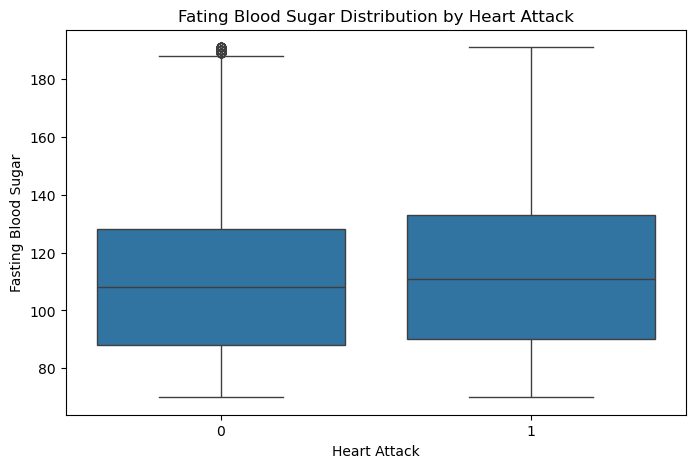

In [51]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='heart_attack', y='fasting_blood_sugar', data=df)
plt.title('Fating Blood Sugar Distribution by Heart Attack')
plt.xlabel('Heart Attack')
plt.ylabel('Fasting Blood Sugar')
plt.show()

2- Converting continuous features to categorical (grouping or proffesionally "binning")

In [52]:
# Define 5-year intervals for age
bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]
labels = ['20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', 
          '55-60', '60-65', '65-70', '70-75', '75-80', '80-85', '85-90']

# Apply pd.cut() to bin the ages
age_binned = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [53]:
# Define cholesterol bins (e.g., low, normal, high cholesterol)
cholesterol_bins = [0, 180, 240, 300]
cholesterol_labels = ['Low', 'Normal', 'High']

# Apply pd.cut() to bin the cholesterol levels
cholesterol_binned = pd.cut(df['cholesterol_level'], bins=cholesterol_bins, labels=cholesterol_labels, right=False)

In [54]:
# Define waist circumference bins
waist_bins = [0, 94, 102, 200]
waist_labels = ['Low risk', 'Increased risk', 'High risk']

# Apply pd.cut() to bin the waist circumference values
waist_binned = pd.cut(df['waist_circumference'], bins=waist_bins, labels=waist_labels, right=False)

In [55]:
# Define fasting blood sugar bins
sugar_bins = [0, 100, 126, 300]
sugar_labels = ['Normal', 'Prediabetes', 'Diabetes']

# Apply pd.cut() to bin the fasting blood sugar values
sugar_binned = pd.cut(df['fasting_blood_sugar'], bins=sugar_bins, labels=sugar_labels, right=False)

In [56]:
print(df.shape)

(155945, 19)


3- k-modes clustering

In [57]:
#%pip install kmodes

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1397019.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1397019.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 1397019.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 1397019.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 1397019.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 25426, cost: 1329202.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 43898, cost: 1315944.0
Run 2, iteration: 2/100, moves: 377, cost: 1315944.0


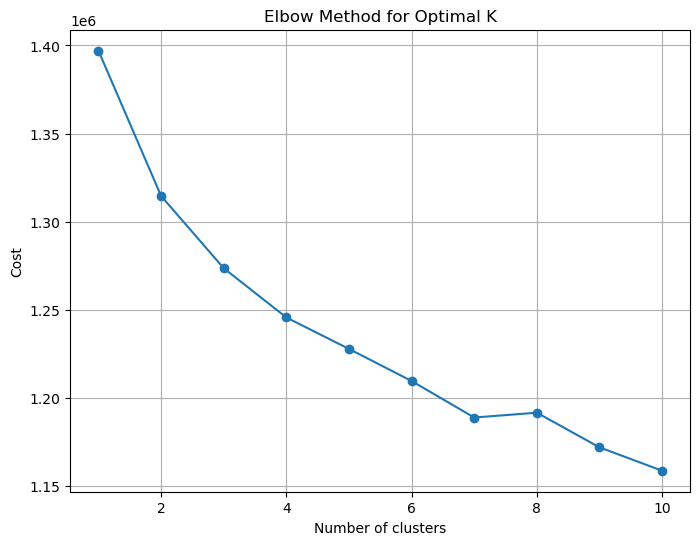

In [58]:
from kmodes.kmodes import KModes
#import numpy as np

# Function to plot the elbow curve for a given dataset
def plot_elbow_curve(data, max_clusters=10):
    costs = []
    for k in range(1, max_clusters+1):
        kmodes = KModes(n_clusters=k, init='Huang', n_init=5, verbose=1)
        kmodes.fit(data)
        costs.append(kmodes.cost_)
    
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters+1), costs, marker='o')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of clusters')
    plt.ylabel('Cost')
    plt.grid(True)
    plt.show()

# Apply the elbow method to determine the optimal number of clusters for the entire dataset
plot_elbow_curve(df.drop(columns=['heart_attack']), max_clusters=10)

When you use the elbow method graph, the idea is to find the "knee/elbow point" ("the optimal k") — the point where adding more clusters doesn’t improve much the cost (i.e., cost stops decreasing significantly) (the curve bends and flattens)  (The curve was going down fast, but after that point it flattens).


In [59]:
# Based on the elbow curve, let's choose 2 clusters (as the research suggests)
kmodes = KModes(n_clusters=5, init='Huang', n_init=5, verbose=1)
kmodes.fit(df.drop(columns=['heart_attack']))  # Drop target column if needed
df['Cluster'] = kmodes.labels_

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 27319, cost: 1261267.0
Run 1, iteration: 2/100, moves: 7431, cost: 1261267.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 40632, cost: 1239195.0
Run 2, iteration: 2/100, moves: 10578, cost: 1239195.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 36393, cost: 1255688.0
Run 3, iteration: 2/100, moves: 421, cost: 1255688.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 52453, cost: 1257989.0
Run 4, iteration: 2/100, moves: 7794, cost: 1257989.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 56064, cost: 1229113.0
Run 5, iteration: 2/100, moves: 61, cost: 1229113.0
Best run was number 5


We found that optimal k is 5,  meaning we divided our data into 5 groups (clusters) based on similarity.

Rows (patients) that have similar values across the features are grouped together.
Example:
Patient 1 and Patient 2 are similar (same Gender, same Smoking_status, same Physical_activity) → they are assigned to the same cluster (Cluster 0).
Patient 3 is different, so it’s assigned to Cluster 2.

After applying k-modes clustering with n_clusters=5, each record (row) in our dataset is assigned to one of the 5 clusters.

The Cluster column shows which cluster each row belongs to.

The values 0, 1, 2, 3, 4 are just labels.
These labels don’t have a real meaning like “cluster 0 is better than cluster 1” — they are just identifiers.

You can now treat "Cluster" as a normal categorical feature for your models.

4- Encoding (convert categorical to numerical features)

In [60]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    unique_values = df[col].unique()
    print(f"{col}: {unique_values}")

gender: ['Male' 'Female']
region: ['Rural' 'Urban']
income_level: ['Middle' 'Low' 'High']
smoking_status: ['Never' 'Past' 'Current']
alcohol_consumption: ['Moderate' 'High']
physical_activity: ['High' 'Moderate' 'Low']
dietary_habits: ['Unhealthy' 'Healthy']
air_pollution_exposure: ['Moderate' 'High' 'Low']
stress_level: ['Moderate' 'High' 'Low']
EKG_results: ['Normal' 'Abnormal']


In [61]:
# Label encoding for categorical features having 2 unique values
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform
df['gender'] = label_encoder.fit_transform(df['gender'])
df['region'] = label_encoder.fit_transform(df['region'])
df['alcohol_consumption'] = label_encoder.fit_transform(df['alcohol_consumption'])
df['dietary_habits'] = label_encoder.fit_transform(df['dietary_habits'])
df['EKG_results'] = label_encoder.fit_transform(df['EKG_results'])

In [62]:
# One-hot encoding for categorical features having more than 2 unique values
df = pd.get_dummies(df, columns=['income_level', 'smoking_status', 'physical_activity', 'air_pollution_exposure', 'stress_level'])

In [63]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)

Index([], dtype='object')


In [64]:
df.head()

,age,gender,region,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,alcohol_consumption,dietary_habits,...,smoking_status_Past,physical_activity_High,physical_activity_Low,physical_activity_Moderate,air_pollution_exposure_High,air_pollution_exposure_Low,air_pollution_exposure_Moderate,stress_level_High,stress_level_Low,stress_level_Moderate
0,60,1,0,0,1,211,0,83,1,1,...,False,True,False,False,False,False,True,False,False,True
1,53,0,1,0,0,208,0,106,1,0,...,True,False,False,True,True,False,False,True,False,False
2,62,0,1,0,0,231,1,112,1,0,...,True,False,False,True,False,True,False,False,True,False
3,73,1,1,1,0,202,0,82,1,1,...,False,False,False,True,False,True,False,True,False,False
4,52,1,1,1,0,232,0,89,1,1,...,False,False,False,True,True,False,False,False,False,True


In [65]:
# Save the clustered dataset with added Cluster column
#df.to_csv('processed_data.csv', index=False)